<a href="https://colab.research.google.com/github/nguyenbac5299/DataScience/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing the tools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics._plot.roc_curve import roc_curve
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

#Load Data

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/7.1 heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

#Data Exploration (exploratory data analysis or EDA)

In [ ]:
# Let's find out how many of eadch class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

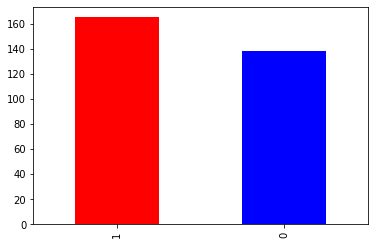

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['red','blue']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequency according to gender

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

##Making our crosstab visual

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

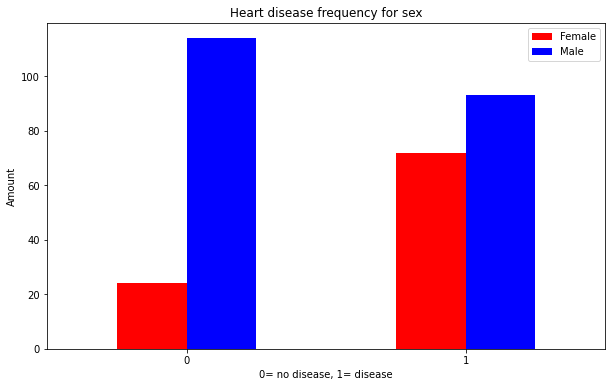

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['red', 'blue'])

plt.title('Heart disease frequency for sex')
plt.xlabel('0= no disease, 1= disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation=0)

## Age vs Max Heart rate for Heart Disease

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

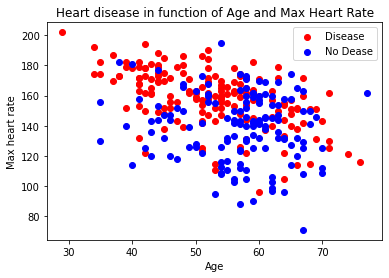

In [ ]:
# Scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='red')
# Scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue');
# add some helpful info
plt.title('Heart disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No Dease'])

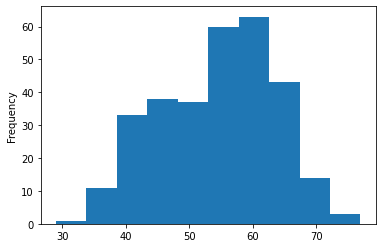

In [ ]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

##Heart Disease Frequency per Chest Pain Type

In [ ]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

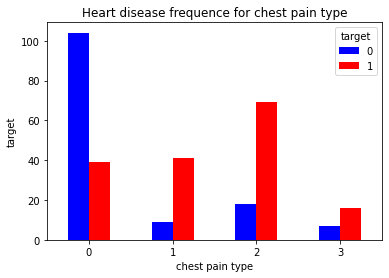

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind='bar', color=['blue','red'])

plt.title('Heart disease frequence for chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('target')
plt.xticks(rotation=0)

##Correlation between independent variables

In [ ]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


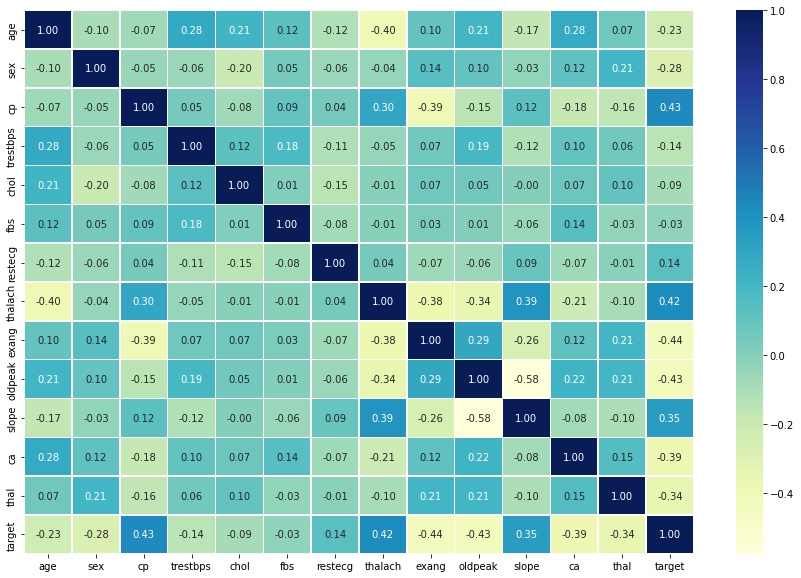

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix= df.corr()

fig, ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

##Enough EDA, let's model

#Modeling

##Training and test split

In [ ]:
X= df.drop('target', axis= 1)
y= df['target']

In [ ]:
np.random.seed(42)

X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))


##Model choices
Try 3  machine learning model:
1. LogisticRegression
2. KNeighbor Classification
3. Ensemble: RandomForestClassifier

In [ ]:
# put model in the dictionary

models={'Logistic_Regression': LogisticRegression(),
        'KNN': KNeighborsClassifier(),
        'RandomForest': RandomForestClassifier()}

# create a function to fit and score model
def fit_and_score(model, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  # make a dictionary to keep model scores
  model_scores={}
  #Loop through models
  for name, model in models.items():
    # fit model to data
    model.fit(X_train, y_train)
    # evaluate the model and append score to model_scores
    model_scores[name]= model.score(X_test, y_test)

  return model_scores

In [ ]:
model_scores= fit_and_score(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_scores

{'Logistic_Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

##Model Comparision

In [ ]:
model_compare= pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,Logistic_Regression,KNN,RandomForest
accuracy,0.885246,0.688525,0.836066


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

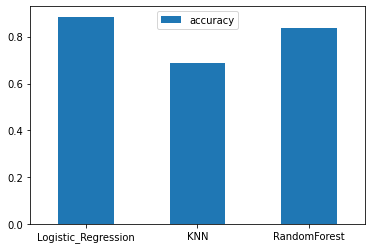

In [ ]:
model_compare.T.plot.bar();
plt.xticks(rotation=0)

#Hyperparameter tuning and cross-validation

##Tune KNeighborsClassifier(K-Nearest neighbors or KNN) by hand

In [ ]:
# Let's turn KNN

train_scores=[]
test_scores=[]

# Create a list of different value for n_neighbors
neighbors= range(1,21)

# Setup KNN instance
knn= KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  #Fit the algorithm
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))


Max score: 75.41


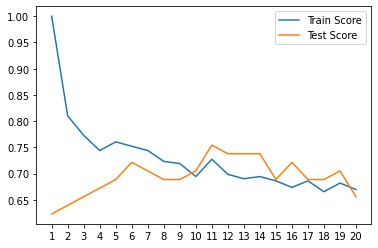

In [ ]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f'Max score: {max(test_scores)*100:.2f}')

##Tuning models with RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={'C':np.logspace(-4,4,20),
              'solver':['liblinear']}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,10000,50),
           'max_depth': [None,10,100,1000],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}


In [ ]:
# Tune LogisticRegression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Tune RandomForestClassifier
np.random.seed(42)

rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 100, 1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1210...
       6610, 6660, 6710, 6760, 6810, 6860, 6910, 6960, 7010, 7060, 7110,
       7160, 7210, 7260, 7310, 7360, 7410, 7460, 7510, 7560, 7610, 7660,
       7710, 7760, 7810, 7860, 7910, 7960, 8010, 8060, 8110, 8160, 8210,
       8260, 8310, 8360, 8410, 8460, 8510, 8560, 8610, 8660, 8710, 8760,
       8810, 8860, 8910, 8960, 9010, 9060, 9110, 9160, 9210, 9260, 9310,
       9360, 9410, 9460, 9510, 9560, 9610, 

In [ ]:
rs_rf.best_params_

{'n_estimators': 6260,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_depth': 1000}

In [ ]:
rs_rf.score(X_test, y_test)

0.8688524590163934

##Tuning a model with GridSearchCV

In [ ]:
# Different hyperparameter for our LogisticRegression model
log_reg_grid={'C': np.logspace(-4,4,30),
              'solver':['liblinear']}

# Setup grid hyperparameter for GridSearchCV

gs_log_reg= GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

#Evaluating a classification model, beyound accuracy

In [ ]:
y_preds= gs_log_reg.predict(X_test)

##ROC Curve and AUC Scores

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


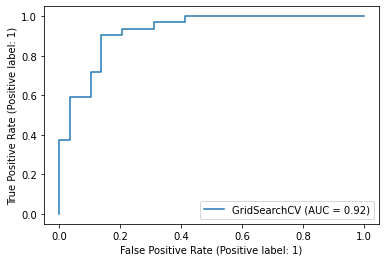

In [ ]:
# Plot Roc Curve and caculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

##Confusion matrix

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


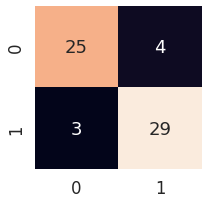

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):

  fig, ax= plt.subplots(figsize=(3,3))
  ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                  annot=True,
                  cbar=False)
  
plot_conf_mat(y_test, y_preds)

##Classification report

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf= LogisticRegression(C= 0.20433597178569418,
                        solver='liblinear')

In [ ]:
# Cross-validated accuracy
cv_acc= cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
# Cross- validated precision
cv_precision= cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision= np.mean(cv_precision)
cv_precision

0.8207936507936507

In [ ]:
cv_recall= cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall= np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
cv_f1= cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

In [ ]:
# Visualize cross-validated metrics
cv_metrics= pd.DataFrame({'Accurancy': cv_acc,
                          'Precision':cv_precision,
                          'Recall':cv_recall,
                          'F1': cv_f1}, index=[0])

In [ ]:
cv_metrics

,Accurancy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


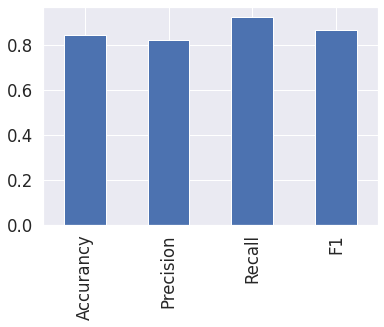

In [ ]:
cv_metrics.T.plot.bar(legend=False)

#Feature importance

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf= LogisticRegression(C= 0.20433597178569418,
                        solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))

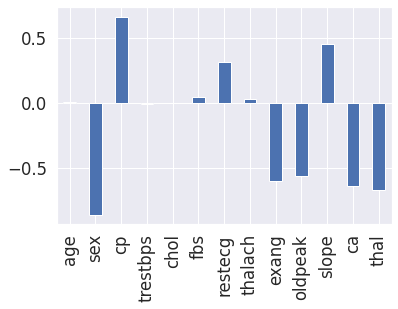

In [ ]:
# Visualize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(legend=False)